# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng =  city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | flinders
Processing Record 3 of Set 1 | poronaysk
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | truckee
Processing Record 6 of Set 1 | quimper
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | norman wells
Processing Record 9 of Set 1 | punta alta
Processing Record 10 of Set 1 | arrecife
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | meyungs
City not found. Skipping...
Processing Record 21 of Set 1 | north bend
Processing Record 22 o

Processing Record 37 of Set 4 | tuktoyaktuk
Processing Record 38 of Set 4 | codrington
Processing Record 39 of Set 4 | khawhai
Processing Record 40 of Set 4 | saint-philippe
Processing Record 41 of Set 4 | anamur
Processing Record 42 of Set 4 | bacolod
Processing Record 43 of Set 4 | bojnurd
Processing Record 44 of Set 4 | vila franca do campo
Processing Record 45 of Set 4 | yelizovo
Processing Record 46 of Set 4 | pundaguitan
Processing Record 47 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 48 of Set 4 | shingu
Processing Record 49 of Set 4 | adrar
Processing Record 0 of Set 5 | sao filipe
Processing Record 1 of Set 5 | san juan
Processing Record 2 of Set 5 | tres arroyos
Processing Record 3 of Set 5 | ushtobe
Processing Record 4 of Set 5 | vardo
Processing Record 5 of Set 5 | plaster rock
Processing Record 6 of Set 5 | touros
Processing Record 7 of Set 5 | porto novo
Processing Record 8 of Set 5 | airai
Processing Record 9 of Set 5 | kurilsk
Processing Record 

Processing Record 30 of Set 8 | pangnirtung
Processing Record 31 of Set 8 | shelburne
Processing Record 32 of Set 8 | fukue
Processing Record 33 of Set 8 | sydney
Processing Record 34 of Set 8 | kafue
Processing Record 35 of Set 8 | yar-sale
Processing Record 36 of Set 8 | gornopravdinsk
Processing Record 37 of Set 8 | young
Processing Record 38 of Set 8 | kathu
Processing Record 39 of Set 8 | jalu
Processing Record 40 of Set 8 | iskateley
Processing Record 41 of Set 8 | guarapuava
Processing Record 42 of Set 8 | fort nelson
Processing Record 43 of Set 8 | saint george
Processing Record 44 of Set 8 | opelika
Processing Record 45 of Set 8 | tucupita
Processing Record 46 of Set 8 | tongliao
Processing Record 47 of Set 8 | caravelas
Processing Record 48 of Set 8 | dunedin
Processing Record 49 of Set 8 | lasa
Processing Record 0 of Set 9 | wajir
Processing Record 1 of Set 9 | college
Processing Record 2 of Set 9 | roma
Processing Record 3 of Set 9 | karratha
Processing Record 4 of Set 9 | 

Processing Record 17 of Set 12 | pinega
Processing Record 18 of Set 12 | inta
Processing Record 19 of Set 12 | pangai
Processing Record 20 of Set 12 | morondava
Processing Record 21 of Set 12 | santiago
Processing Record 22 of Set 12 | dong hoi
Processing Record 23 of Set 12 | grand gaube
Processing Record 24 of Set 12 | beatrice
Processing Record 25 of Set 12 | phan rang
City not found. Skipping...
Processing Record 26 of Set 12 | ranot
Processing Record 27 of Set 12 | port augusta
Processing Record 28 of Set 12 | paita
Processing Record 29 of Set 12 | hunza
City not found. Skipping...
Processing Record 30 of Set 12 | hundested
Processing Record 31 of Set 12 | ambon
Processing Record 32 of Set 12 | srednekolymsk
Processing Record 33 of Set 12 | acapulco
Processing Record 34 of Set 12 | quelimane
Processing Record 35 of Set 12 | malwan
City not found. Skipping...
Processing Record 36 of Set 12 | ponta delgada
Processing Record 37 of Set 12 | isla vista
Processing Record 38 of Set 12 | 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,11.56,61,98,10.61,NZ,1682306908
1,flinders,-34.5833,150.8552,23.54,71,74,0.45,AU,1682306908
2,poronaysk,49.2167,143.1167,6.79,44,94,5.94,RU,1682306908
3,port elizabeth,-33.9180,25.5701,18.39,92,20,3.09,ZA,1682306766
4,truckee,39.3280,-120.1833,14.18,59,0,3.09,US,1682306909


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

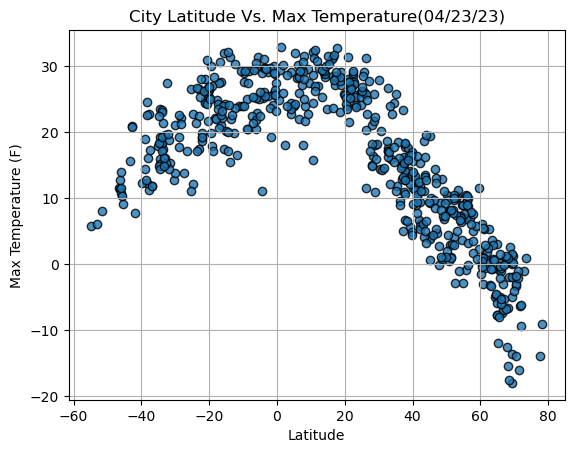

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

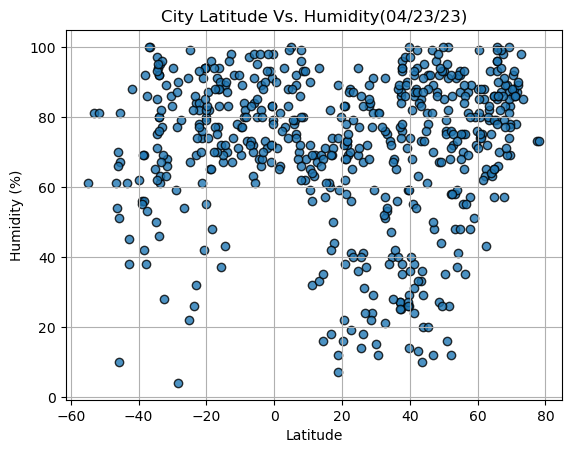

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

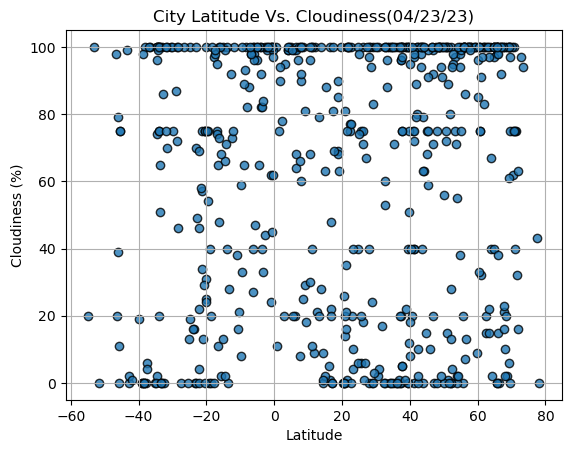

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

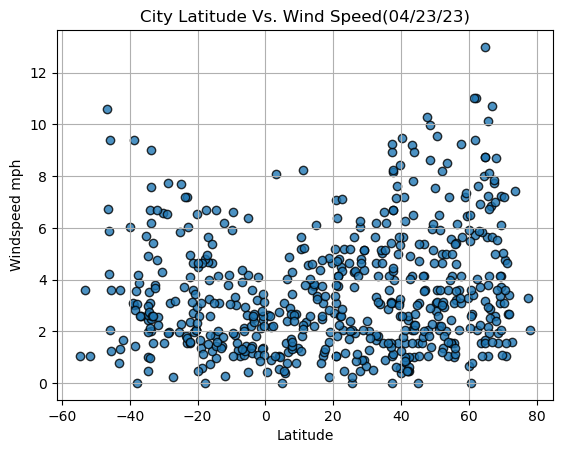

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,poronaysk,49.2167,143.1167,6.79,44,94,5.94,RU,1682306908
4,truckee,39.3280,-120.1833,14.18,59,0,3.09,US,1682306909
5,quimper,48.0000,-4.1000,9.31,87,75,1.03,FR,1682306909
7,norman wells,65.2820,-126.8329,-11.98,79,100,5.66,CA,1682306909
9,arrecife,28.9630,-13.5477,17.99,77,0,5.14,ES,1682306892


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,11.56,61,98,10.61,NZ,1682306908
1,flinders,-34.5833,150.8552,23.54,71,74,0.45,AU,1682306908
3,port elizabeth,-33.9180,25.5701,18.39,92,20,3.09,ZA,1682306766
6,port alfred,-33.5906,26.8910,21.45,61,100,2.00,ZA,1682306909
8,punta alta,-38.8759,-62.0736,14.48,56,0,3.02,AR,1682306909


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.9170631555602611


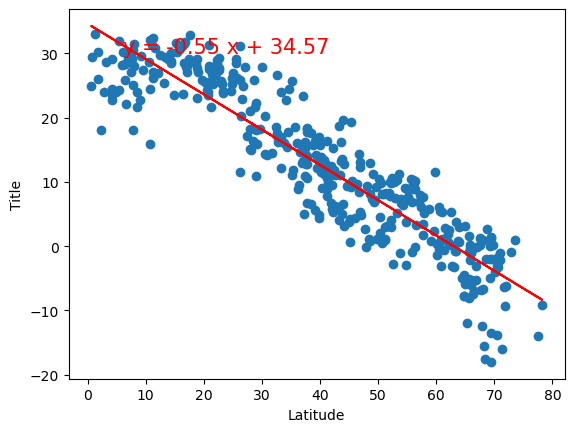

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))


The r-squared is: 0.7080395008876301


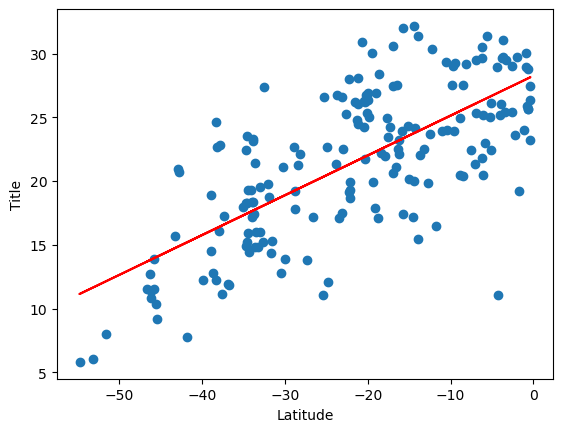

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** In the above Northern hemisphere plot and Southern hemisphere plot there is a r-squared value that is close to 1. The large r-square value suggests that the temperature of a location is affected by the latitude. The high r-squared value implies that a linear regression model fits the data of temperature vs. latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


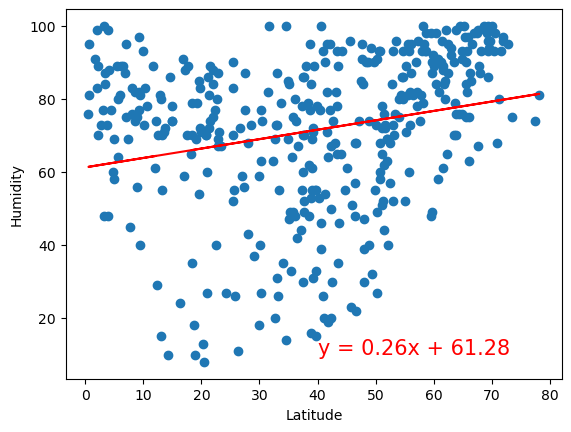

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.1547299877947115


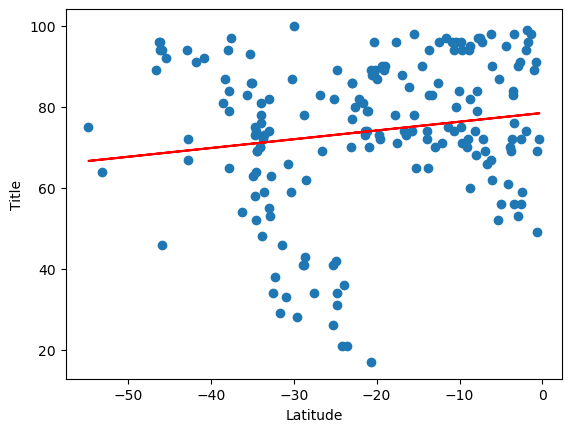

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** In the above Northern hemisphere plot and Southern hemisphere plot there is a r-squared value that is below 1. The small r-square value suggests that the Humidity of a location is not affected by the latitude. The low r-squared value implies that a linear regression model does not best fits the data of Humidity vs. latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.12106604654147356


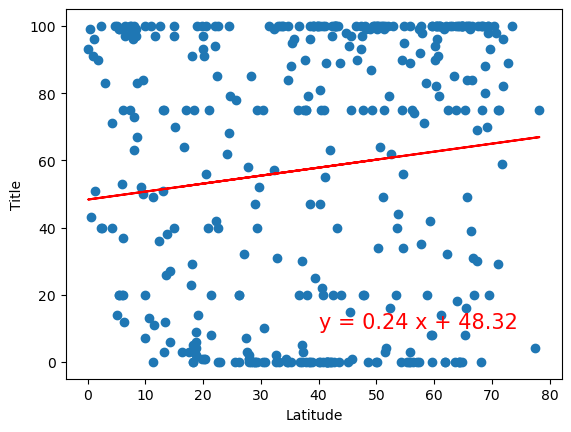

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.09507660583832446


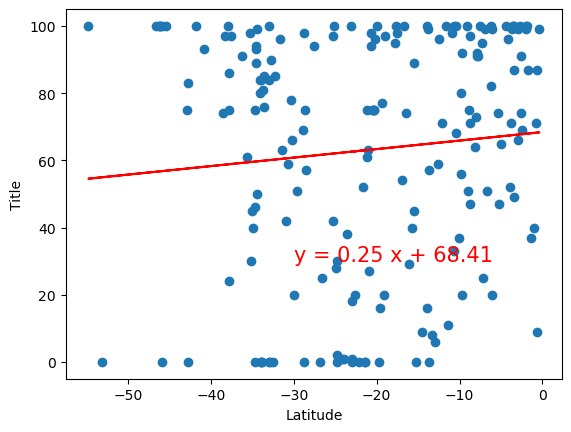

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** In the above Northern hemisphere plot and Southern hemisphere plot there is a r-squared value that is below 1. The small r-square value suggests that the cloudiness of a location is not affected by the latitude. The low r-squared value implies that a linear regression model does not best fits the data of Cloudiness vs. latitude. That data of both plots is too spread out for there to be a direct correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03740784661682109


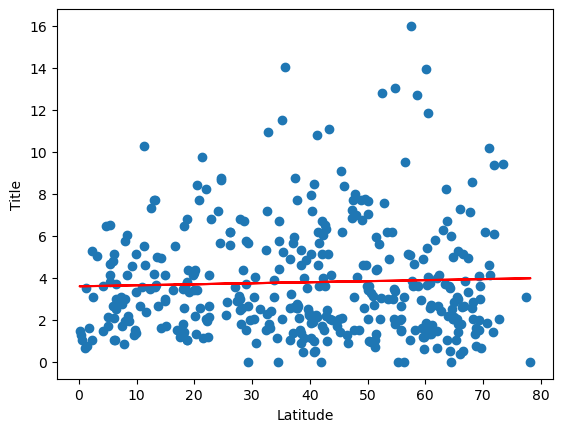

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.3269276168045212


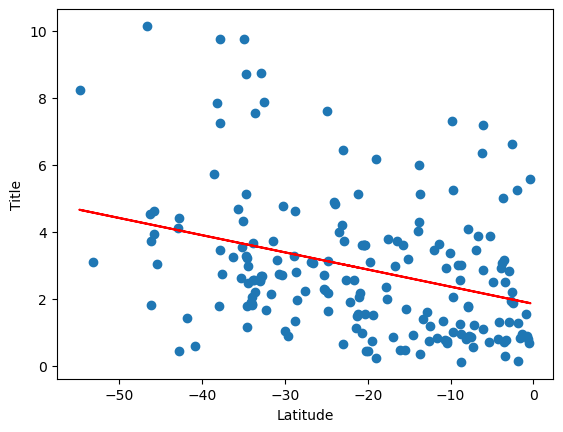

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** In the above Northern hemisphere plot and Southern hemisphere plot there is a r-squared value that is below 1. The small r-square value suggests that the wind speed of a location is not affected by the latitude. The low r-squared value implies that a linear regression model does not best fits the data of wind speed vs. latitude. That data of both plots is too spread out for there to be a direct correlation.